### value house R , U

In [27]:
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
r_house=pd.read_csv(r"D:\quera_dore\project1\data\Fateme_Dataset\R_arzesh_khane.csv")
u_house=pd.read_csv(r"D:\quera_dore\project1\data\Fateme_Dataset\U_arzesh_khane.csv")
r_house.head()

,per_meter
0,0.742898
1,0.619082
2,27.858671
3,2.228694
4,7.428979


In [28]:
u_house.head()

,per_meter
0,12.808680
1,6.190862
2,2.785888
3,6.686131
4,27.014670


### check distribution of data (normal or not)

<Axes: ylabel='Count'>

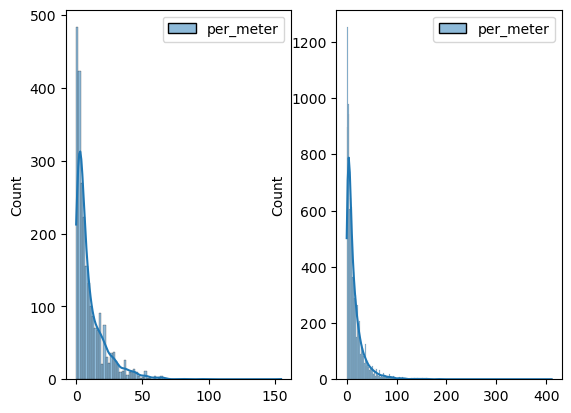

In [29]:
fig_houses, ax_houses = plt.subplots(1, 2)
sns.histplot(r_house, ax=ax_houses[0], kde=True)
sns.histplot(u_house, ax=ax_houses[1], kde=True)

نمودار توزیع دیتا به فرم نرمال نیست.


تست نرمال بودن دیتا را با یک روش دیگر هم انجام می دهیم:

In [30]:
stat, p_value = sp.stats.shapiro(r_house)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


In [31]:
stat, p_value = sp.stats.shapiro(u_house)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11163.
  res = hypotest_fun_out(*samples, **kwds)


چون تعداد داده های خانه های شهری بیشتر از 5000 داده است و ممکن است تست فوق دچار خطا شود، از تست جایگزین زیر استفاده می کنیم

In [46]:
result = sp.stats.anderson(u_house.per_meter)

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

	sl, cv = result.significance_level[i], result.critical_values[i]

	if result.statistic < result.critical_values[i]:

		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))

	else:

		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 976.127
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


### Hypothesis test

In [32]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(r_house, u_house , alternative='two-sided')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [11347983.], p-value: [6.66679949e-51]
we reject null hypothesis


یعنی به طور میانگین تفاوت مشهودی میان ارزش خانه های شهری و روستایی مشاهده وجود دارد

### members_incomes_by_education

In [11]:
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
members_education_r=pd.read_csv(r"D:\quera_dore\project1\data\Fateme_Dataset\members_incomes_by_education_dataset_r98.csv")
members_education_u=pd.read_csv(r"D:\quera_dore\project1\data\Fateme_Dataset\members_incomes_by_education_dataset_u98.csv")
members_education_r

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,20010394208,1,Elemantry,0.0,100000000.0,2500000.0,32760000.0,135260000.0
1,20004387813,1,No degree,60000000.0,0.0,0.0,10920000.0,70920000.0
2,20003386610,1,No degree,43200000.0,0.0,20000000.0,10920000.0,74120000.0
3,20003386613,1,No degree,0.0,0.0,22000000.0,5460000.0,27460000.0
4,20003386620,1,Elemantry,21600000.0,103000000.0,500000.0,10920000.0,136020000.0
...,...,...,...,...,...,...,...,...
28232,23001701014,1,Secondary,0.0,360000000.0,4120000.0,10920000.0,375040000.0
28233,23001701017,1,Elemantry,0.0,0.0,189520000.0,16380000.0,205900000.0
28234,23001701017,3,College,192000000.0,0.0,0.0,0.0,192000000.0
28235,23001701020,1,Secondary,0.0,336000000.0,5520000.0,16380000.0,357900000.0


In [12]:
members_education=pd.concat([members_education_r,members_education_u] , axis=0)
members_education

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,20010394208,1,Elemantry,0.0,100000000.0,2500000.0,32760000.0,135260000.0
1,20004387813,1,No degree,60000000.0,0.0,0.0,10920000.0,70920000.0
2,20003386610,1,No degree,43200000.0,0.0,20000000.0,10920000.0,74120000.0
3,20003386613,1,No degree,0.0,0.0,22000000.0,5460000.0,27460000.0
4,20003386620,1,Elemantry,21600000.0,103000000.0,500000.0,10920000.0,136020000.0
...,...,...,...,...,...,...,...,...
30541,13001371814,1,Secondary,0.0,0.0,5150000.0,10920000.0,16070000.0
30542,13001371814,2,Elemantry,0.0,0.0,198000000.0,0.0,198000000.0
30543,13001376708,1,Diploma,0.0,360000000.0,86900000.0,16380000.0,463280000.0
30544,13001376708,3,Diploma,16800000.0,0.0,0.0,0.0,16800000.0


In [14]:
members_education.degree.unique()

array(['Elemantry', 'No degree', 'Diploma', 'Secondary', 'Bachelor',
       'Master', 'College', 'HighSchool', 'Other', 'PhD'], dtype=object)

In [20]:
No_degree=members_education[(members_education.degree.str.contains('Elemantry'))|(members_education.degree.str.contains('No degree'))|(members_education.degree.str.contains('Secondary'))|(members_education.degree.str.contains('HighSchool'))|(members_education.degree.str.contains('Other'))]
degree=members_education[(members_education.degree.str.contains('Bachelor'))|(members_education.degree.str.contains('Master'))|(members_education.degree.str.contains('PhD'))]
No_degree

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,20010394208,1,Elemantry,0.0,100000000.0,2500000.0,32760000.0,135260000.0
1,20004387813,1,No degree,60000000.0,0.0,0.0,10920000.0,70920000.0
2,20003386610,1,No degree,43200000.0,0.0,20000000.0,10920000.0,74120000.0
3,20003386613,1,No degree,0.0,0.0,22000000.0,5460000.0,27460000.0
4,20003386620,1,Elemantry,21600000.0,103000000.0,500000.0,10920000.0,136020000.0
...,...,...,...,...,...,...,...,...
30539,13001376723,1,Elemantry,0.0,363000000.0,5150000.0,27300000.0,395450000.0
30540,13001376723,6,Elemantry,0.0,0.0,214250000.0,10920000.0,225170000.0
30541,13001371814,1,Secondary,0.0,0.0,5150000.0,10920000.0,16070000.0
30542,13001371814,2,Elemantry,0.0,0.0,198000000.0,0.0,198000000.0


In [51]:
degree_incom=degree[degree.total_income]

degree_incom

NameError: name 'degree' is not defined

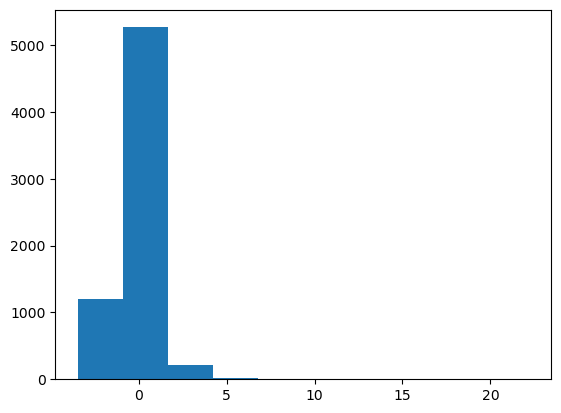

,total_income
31,108500000.0
39,272000000.0
86,144000000.0
98,15000000.0
151,135000000.0
...,...
30509,289280000.0
30522,593400024.0
30525,376660000.0
30537,563200000.0


In [42]:
fig_degree, ax_degree = plt.subplots(1, 2)
sns.histplot(r_house, ax=ax_degree[0], kde=True)
sns.histplot(u_house, ax=ax_degree[1], kde=True)

In [ ]:
qqnorm(df_standard, main = "QQ Plot", pch = 20)
qqline(df_standard, col = "red")